In [79]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import datetime as datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

print("Python Version:", sys.version)

Python Version: 3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]


## Some more cleaning and EDA

In [10]:
df= pd.read_csv('cleaned_imdb_mojo.csv')

In [137]:
df.head()

,Rank_MOJO_by_Box_office,Title,Lifetime_Gross_MOJO,Max_Theaters,Opening_Box,Opening_Th,User_Rating_IMDB,Metacritic,Number_of_votes_IMDB,Release_Difference,...,Neon,Other,Overture Films,Paramount Classics,Paramount Pictures,Sony Pictures Entertainment (SPE),United Artists,Walt Disney Studios Motion Pictures,Warner Bros.,Warner Independent Pictures (WIP)
0,1,Fahrenheit 9/11,119194771,2011.0,23920637.0,868.0,7.5,67.0,125629,8475.0,...,0,0,0,0,0,0,0,0,0,0
1,2,March of the Penguins,77437223,2506.0,137492.0,4.0,7.5,79.0,55375,8841.0,...,0,0,0,0,0,0,0,0,0,1
2,4,This Is It,72091016,3481.0,23234394.0,3481.0,7.2,67.0,38161,10428.0,...,0,0,0,0,0,1,0,0,0,0
3,5,Under the Sea 3D,36262926,108.0,661185.0,49.0,7.5,77.0,1730,10171.0,...,0,0,0,0,0,0,0,0,1,0
4,7,Earth,32011576,1804.0,8825760.0,1804.0,8.0,72.0,14137,10239.0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df.drop(['Unnamed: 0'], inplace = True, axis = 1)
df = df.dropna()

In [12]:
df.shape

(524, 13)

In [13]:
df.reset_index(inplace = True)

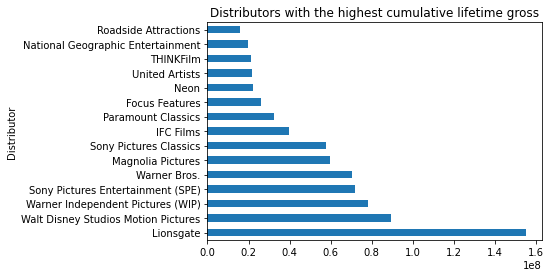

In [14]:
df_distributor = df.groupby(['Distributor'])['Lifetime_Gross_MOJO'].sum()
distributor_sorted = df_distributor.sort_values(ascending = False)
distributor_sorted = distributor_sorted.head(15)
bar_plot = distributor_sorted.plot(kind = 'barh', title = 'Distributors with the highest cumulative lifetime gross')
#caveat = accumulation of the films, did not take an average with number of films produced

In [17]:
distributor_counts = df['Distributor'].value_counts()
#distributor_counts.head(50)

In [18]:
#identify the distributors that make the highest grossing films.
distributor_gross_average = (df.groupby(['Distributor'])['Lifetime_Gross_MOJO'].sum())/(df['Distributor'].value_counts())
distributor_gross_average = distributor_gross_average.sort_values(ascending = False)
top_distributor_gross_average = distributor_gross_average.head(15)
top_distributor_gross_average


Sony Pictures Entertainment (SPE)      7.209102e+07
Warner Independent Pictures (WIP)      3.907228e+07
IMAX                                   1.565062e+07
Lionsgate                              1.552693e+07
Walt Disney Studios Motion Pictures    1.490551e+07
Overture Films                         1.436340e+07
Warner Bros.                           1.412085e+07
IDP Distribution                       1.153642e+07
United Artists                         1.091569e+07
Paramount Classics                     1.086079e+07
Focus Features                         8.761135e+06
Paramount Pictures                     5.607878e+06
National Geographic Entertainment      4.892484e+06
CBS Films                              4.600249e+06
Neon                                   4.430710e+06
dtype: float64

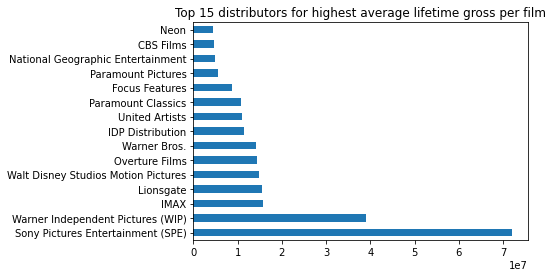

In [19]:
bar_plot = top_distributor_gross_average.plot(kind = 'barh', title = 'Top 15 distributors for highest average lifetime gross per film')

In [20]:
top_distributor_list = list(top_distributor_gross_average.index)

In [21]:
top_distributor_list

['Sony Pictures Entertainment (SPE)',
 'Warner Independent Pictures (WIP)',
 'IMAX',
 'Lionsgate',
 'Walt Disney Studios Motion Pictures',
 'Overture Films',
 'Warner Bros.',
 'IDP Distribution',
 'United Artists',
 'Paramount Classics',
 'Focus Features',
 'Paramount Pictures',
 'National Geographic Entertainment',
 'CBS Films',
 'Neon']

In [22]:
def distributor(x):
    if x in top_distributor_list:
        return(x)
    if x not in top_distributor_list:
        return('Other')
df['Distributor'] = df['Distributor'].apply(distributor)

In [23]:
df.drop(['index', 'Running_Time', 'Director'], inplace = True, axis = 1)
df1 = pd.get_dummies(df['Distributor'])
df = pd.concat([df, df1], axis=1)
df.drop(['Distributor'], inplace = True, axis = 1)
df

,Rank_MOJO_by_Box_office,Title,Lifetime_Gross_MOJO,Max_Theaters,Opening_Box,Opening_Th,User_Rating_IMDB,Metacritic,Number_of_votes_IMDB,Release_Difference,...,Neon,Other,Overture Films,Paramount Classics,Paramount Pictures,Sony Pictures Entertainment (SPE),United Artists,Walt Disney Studios Motion Pictures,Warner Bros.,Warner Independent Pictures (WIP)
0,1,Fahrenheit 9/11,119194771,2011.0,23920637.0,868.0,7.5,67.0,125629,8475.0,...,0,0,0,0,0,0,0,0,0,0
1,2,March of the Penguins,77437223,2506.0,137492.0,4.0,7.5,79.0,55375,8841.0,...,0,0,0,0,0,0,0,0,0,1
2,4,This Is It,72091016,3481.0,23234394.0,3481.0,7.2,67.0,38161,10428.0,...,0,0,0,0,0,1,0,0,0,0
3,5,Under the Sea 3D,36262926,108.0,661185.0,49.0,7.5,77.0,1730,10171.0,...,0,0,0,0,0,0,0,0,1,0
4,7,Earth,32011576,1804.0,8825760.0,1804.0,8.0,72.0,14137,10239.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,1972,Knuckle,2647,3.0,2647.0,3.0,6.8,65.0,2693,11200.0,...,0,1,0,0,0,0,0,0,0,0
520,1986,You're Gonna Miss Me,2324,1.0,1340.0,1.0,7.6,64.0,988,9555.0,...,0,1,0,0,0,0,0,0,0,0
521,1991,Workingman's Death,2214,2.0,2214.0,2.0,8.0,67.0,1647,9086.0,...,0,1,0,0,0,0,0,0,0,0
522,1998,"Accidental Courtesy: Daryl Davis, Race & America",1940,1.0,1452.0,1.0,7.7,63.0,1019,13055.0,...,0,1,0,0,0,0,0,0,0,0


In [24]:
df.columns

Index(['Rank_MOJO_by_Box_office', 'Title', 'Lifetime_Gross_MOJO',
       'Max_Theaters', 'Opening_Box', 'Opening_Th', 'User_Rating_IMDB',
       'Metacritic', 'Number_of_votes_IMDB', 'Release_Difference', 'CBS Films',
       'Focus Features', 'IDP Distribution', 'IMAX', 'Lionsgate',
       'National Geographic Entertainment', 'Neon', 'Other', 'Overture Films',
       'Paramount Classics', 'Paramount Pictures',
       'Sony Pictures Entertainment (SPE)', 'United Artists',
       'Walt Disney Studios Motion Pictures', 'Warner Bros.',
       'Warner Independent Pictures (WIP)'],
      dtype='object')

In [138]:
df.corr()

,Rank_MOJO_by_Box_office,Lifetime_Gross_MOJO,Max_Theaters,Opening_Box,Opening_Th,User_Rating_IMDB,Metacritic,Number_of_votes_IMDB,Release_Difference,CBS Films,...,Neon,Other,Overture Films,Paramount Classics,Paramount Pictures,Sony Pictures Entertainment (SPE),United Artists,Walt Disney Studios Motion Pictures,Warner Bros.,Warner Independent Pictures (WIP)
Rank_MOJO_by_Box_office,1.000000,-0.279574,-0.328757,-0.155764,-0.180661,-0.172836,-0.182006,-0.348604,0.171365,-0.050771,...,-0.086769,0.282828,-0.053916,-0.073029,-0.071551,-0.055894,-0.047061,-0.102029,-0.081282,-0.062137
Lifetime_Gross_MOJO,-0.279574,1.000000,0.777038,0.788736,0.501631,0.071493,-0.015944,0.539745,-0.089704,0.014913,...,0.031351,-0.472896,0.069409,0.086522,0.029072,0.391633,0.071011,0.178283,0.152761,0.293488
Max_Theaters,-0.328757,0.777038,1.000000,0.740415,0.844501,0.026680,-0.068116,0.362793,0.003992,0.028705,...,0.040535,-0.521451,0.133839,0.072524,0.123151,0.503516,0.009481,0.492896,0.044941,0.255450
Opening_Box,-0.155764,0.788736,0.740415,1.000000,0.759249,0.008316,-0.089860,0.324137,-0.037099,-0.001901,...,-0.007677,-0.325340,0.000544,-0.002974,0.085275,0.640162,-0.003765,0.287725,0.014113,-0.004457
Opening_Th,-0.180661,0.501631,0.844501,0.759249,1.000000,-0.023524,-0.111794,0.118133,0.033117,-0.003921,...,-0.012472,-0.375105,-0.006587,0.022813,0.090960,0.611544,-0.008947,0.607455,0.032142,-0.009325
User_Rating_IMDB,-0.172836,0.071493,0.026680,0.008316,-0.023524,1.000000,0.452419,0.256558,-0.204099,0.007750,...,0.021341,-0.023412,-0.001040,-0.032311,-0.032578,-0.018619,-0.001472,0.015468,-0.010226,-0.001472
Metacritic,-0.182006,-0.015944,-0.068116,-0.089860,-0.111794,0.452419,1.000000,0.171673,-0.072821,-0.048553,...,0.082172,0.069574,-0.076566,-0.045366,-0.060799,-0.042950,-0.037006,-0.082729,-0.043589,-0.029075
Number_of_votes_IMDB,-0.348604,0.539745,0.362793,0.324137,0.118133,0.256558,0.171673,1.000000,-0.147302,-0.015914,...,0.012797,-0.305879,0.102914,0.116506,0.002791,0.094541,0.282797,-0.014353,-0.006907,0.100117
Release_Difference,0.171365,-0.089704,0.003992,-0.037099,0.033117,-0.204099,-0.072821,-0.147302,1.000000,0.061519,...,0.126168,0.067882,-0.012756,-0.102028,-0.007302,-0.012022,-0.082790,0.035654,-0.038879,-0.052471
CBS Films,-0.050771,0.014913,0.028705,-0.001901,-0.003921,0.007750,-0.048553,-0.015914,0.061519,1.000000,...,-0.004292,-0.139303,-0.001912,-0.003318,-0.002707,-0.001912,-0.002707,-0.004706,-0.004292,-0.002707


In [139]:
df.head()

,Rank_MOJO_by_Box_office,Title,Lifetime_Gross_MOJO,Max_Theaters,Opening_Box,Opening_Th,User_Rating_IMDB,Metacritic,Number_of_votes_IMDB,Release_Difference,...,Neon,Other,Overture Films,Paramount Classics,Paramount Pictures,Sony Pictures Entertainment (SPE),United Artists,Walt Disney Studios Motion Pictures,Warner Bros.,Warner Independent Pictures (WIP)
0,1,Fahrenheit 9/11,119194771,2011.0,23920637.0,868.0,7.5,67.0,125629,8475.0,...,0,0,0,0,0,0,0,0,0,0
1,2,March of the Penguins,77437223,2506.0,137492.0,4.0,7.5,79.0,55375,8841.0,...,0,0,0,0,0,0,0,0,0,1
2,4,This Is It,72091016,3481.0,23234394.0,3481.0,7.2,67.0,38161,10428.0,...,0,0,0,0,0,1,0,0,0,0
3,5,Under the Sea 3D,36262926,108.0,661185.0,49.0,7.5,77.0,1730,10171.0,...,0,0,0,0,0,0,0,0,1,0
4,7,Earth,32011576,1804.0,8825760.0,1804.0,8.0,72.0,14137,10239.0,...,0,0,0,0,0,0,0,1,0,0


## Baseline Modeling

In [140]:
X = df[[ 'Lifetime_Gross_MOJO','Max_Theaters',
              'Opening_Box', 'Opening_Th', 'User_Rating_IMDB',
              'Number_of_votes_IMDB', 'Release_Difference', 'CBS Films',
              'Focus Features', 'IDP Distribution', 'IMAX', 'Lionsgate',
              'National Geographic Entertainment', 'Neon', 'Other', 'Overture Films',
              'Paramount Classics', 'Paramount Pictures',
              'Sony Pictures Entertainment (SPE)', 'United Artists',
              'Walt Disney Studios Motion Pictures', 'Warner Bros.',
              'Warner Independent Pictures (WIP)']]
y = df['Metacritic']

In [141]:
baseline_model = sm.OLS(y,X)
baseline_fit = baseline_model.fit()
baseline_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Metacritic   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     7.985
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           1.04e-21
Time:                        04:23:34   Log-Likelihood:                -1741.5
No. Observations:                 524   AIC:                             3529.
Df Residuals:                     501   BIC:                             3627.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Lifetime_Gross_MOJO                  1.736e-07   1.59e-07      1.094      0.275   -1.38e-07    4.85e-07
Max_Theaters                           -0.0018      0.005     -0.376      0.707      -0.011       0.008
Opening_Box                         -1.531e-06    7.1e-07     -2.156      0.032   -2.93e-06   -1.36e-07
Opening_Th                              0.0025      0.006      0.445      0.657      -0.009       0.014
User_Rating_IMDB                        6.3343      0.654      9.684      0.000       5.049       7.619
Number_of_votes_IMDB                 8.392e-05   3.14e-05      2.676      0.008    2.23e-05       0.000
Release_Difference                     8.6e-06      0.000      0.055      0.956      -0.000       0.000
CBS Films                              18.0647      8.981      2.011      0.045       0.420      35.709
Focus Features                         26.6401      6.734      3.956      0.000      13.411      39.870
IDP Distribution                       18.0187      8.603      2.094      0.037       1.116      34.921
IMAX                                   25.4817      9.186      2.774      0.006       7.434      43.529
Lionsgate                              25.8818      5.714      4.530      0.000      14.656      37.108
National Geographic Entertainment      27.9198      6.680      4.180      0.000      14.796      41.044
Neon                                   32.3928      6.471      5.006      0.000      19.679      45.107
Other                                  27.2942      5.424      5.032      0.000      16.638      37.951
Overture Films                         10.2640      9.109      1.127      0.260      -7.632      28.160
Paramount Classics                     20.6003      6.398      3.220      0.001       8.029      33.171
Paramount Pictures                     23.8097      7.415      3.211      0.001       9.242      38.377
Sony Pictures Entertainment (SPE)      38.6551     12.882      3.001      0.003      13.347      63.964
United Artists                         15.5215      7.094      2.188      0.029       1.585      29.458
Walt Disney Studios Motion Pictures    23.8535      7.254      3.288      0.001       9.601      38.105
Warner Bros.                           22.2679      6.374      3.493      0.001       9.745      34.791
Warner Independent Pictures (WIP)      17.2239      7.945      2.168      0.031       1.615      32.833
==============================================================================
Omnibus:                        7.871   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.974
Skew:                           0.283   Prob(JB):                       0.0186
Kurtosis:                       2.787   Cond. No.              

## Scale Features before modeling

In [27]:
scaled_features = df.copy()

In [28]:
col_names = ['Rank_MOJO_by_Box_office', 'Lifetime_Gross_MOJO','Max_Theaters',
                     'Opening_Box', 'Opening_Th', 'User_Rating_IMDB', 'Metacritic',
                     'Number_of_votes_IMDB', 'Release_Difference']
features = scaled_features[col_names]

In [29]:
scaler = preprocessing.StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features

In [30]:
scaled_features.head()

,Rank_MOJO_by_Box_office,Title,Lifetime_Gross_MOJO,Max_Theaters,Opening_Box,Opening_Th,User_Rating_IMDB,Metacritic,Number_of_votes_IMDB,Release_Difference,...,Neon,Other,Overture Films,Paramount Classics,Paramount Pictures,Sony Pictures Entertainment (SPE),United Artists,Walt Disney Studios Motion Pictures,Warner Bros.,Warner Independent Pictures (WIP)
0,-1.284412,Fahrenheit 9/11,14.969166,6.515932,15.076391,3.362049,0.177227,-0.982233,8.347225,-1.210989,...,0,0,0,0,0,0,0,0,0,0
1,-1.282356,March of the Penguins,9.638769,8.199294,-0.047641,-0.150645,0.177227,0.555303,3.379333,-1.035570,...,0,0,0,0,0,0,0,0,0,1
2,-1.278245,This Is It,8.956319,11.515007,14.639999,13.985509,-0.425804,-0.982233,2.162074,-0.274940,...,0,0,0,0,0,1,0,0,0,0
3,-1.276190,Under the Sea 3D,4.382824,0.044339,0.285383,0.032308,0.177227,0.299047,-0.414082,-0.398117,...,0,0,0,0,0,0,0,0,1,0
4,-1.272079,Earth,3.840135,5.811980,5.477349,7.167468,1.182277,-0.341593,0.463258,-0.365525,...,0,0,0,0,0,0,0,1,0,0


# Target is Metacritic

## Visualize the data

In [35]:
smaller_df = df.loc[:, ['Lifetime_Gross_MOJO', 'Max_Theaters', 'Opening_Box',
                        'Opening_Th', 'User_Rating_IMDB','Number_of_votes_IMDB', 'Metacritic']]

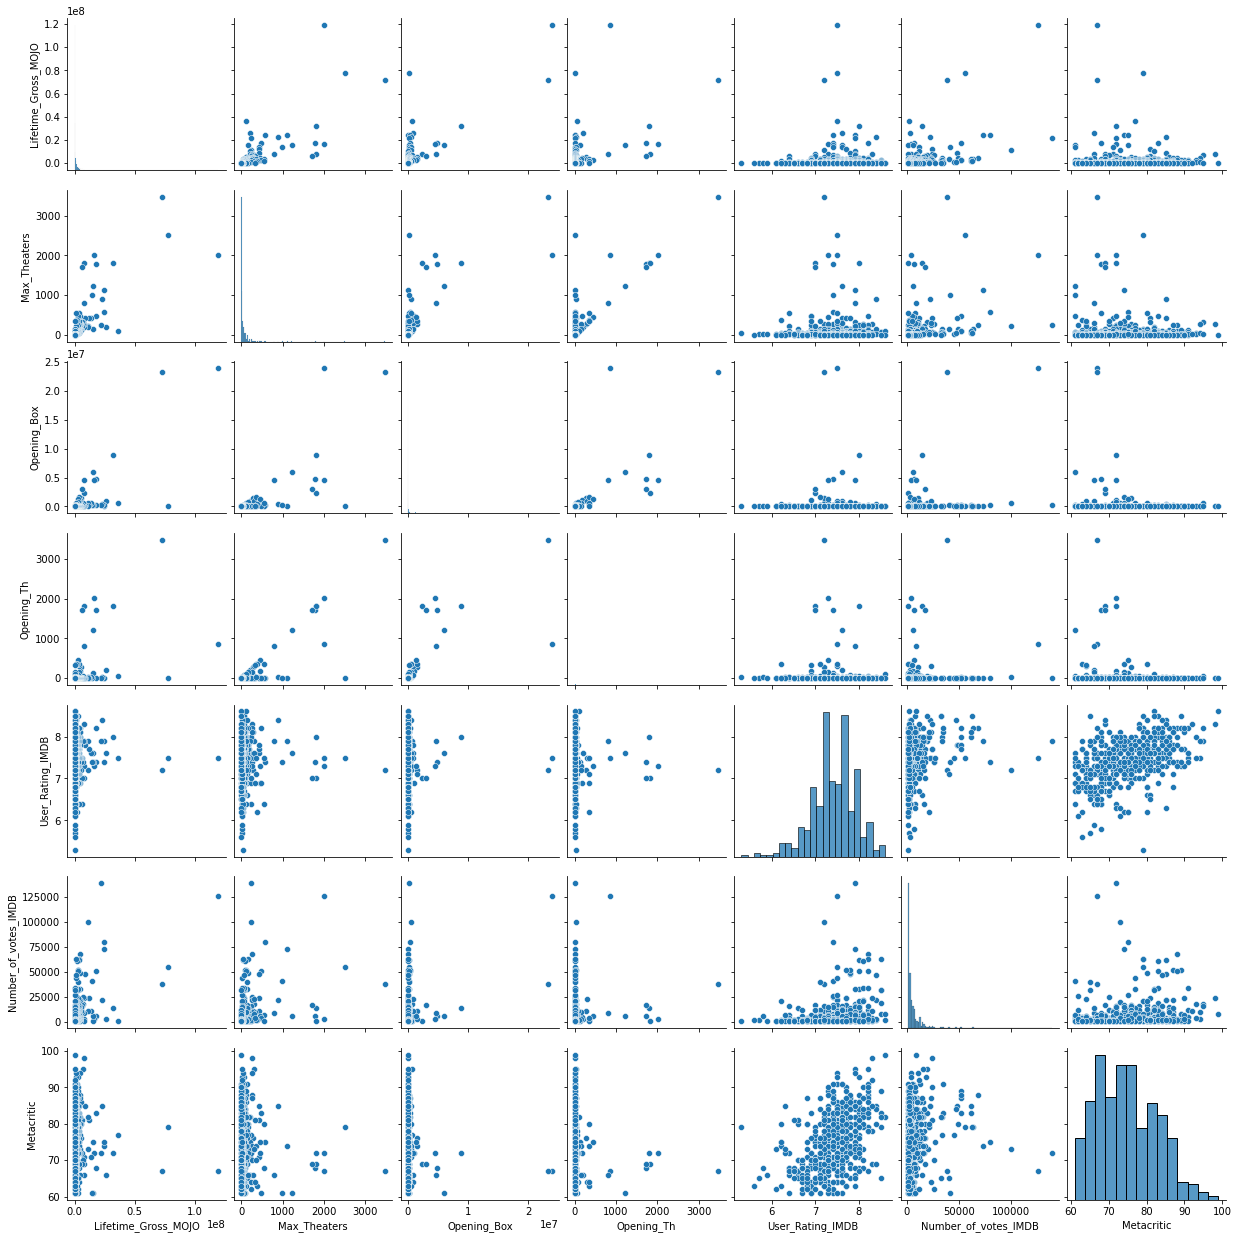

In [69]:
sns.pairplot(smaller_df, kind = 'scatter')

In [37]:
smaller_df.corr()

,Lifetime_Gross_MOJO,Max_Theaters,Opening_Box,Opening_Th,User_Rating_IMDB,Number_of_votes_IMDB,Metacritic
Lifetime_Gross_MOJO,1.000000,0.777038,0.788736,0.501631,0.071493,0.539745,-0.015944
Max_Theaters,0.777038,1.000000,0.740415,0.844501,0.026680,0.362793,-0.068116
Opening_Box,0.788736,0.740415,1.000000,0.759249,0.008316,0.324137,-0.089860
Opening_Th,0.501631,0.844501,0.759249,1.000000,-0.023524,0.118133,-0.111794
User_Rating_IMDB,0.071493,0.026680,0.008316,-0.023524,1.000000,0.256558,0.452419
Number_of_votes_IMDB,0.539745,0.362793,0.324137,0.118133,0.256558,1.000000,0.171673
Metacritic,-0.015944,-0.068116,-0.089860,-0.111794,0.452419,0.171673,1.000000


In [39]:
smaller_df.columns

Index(['Lifetime_Gross_MOJO', 'Max_Theaters', 'Opening_Box', 'Opening_Th',
       'User_Rating_IMDB', 'Number_of_votes_IMDB', 'Metacritic'],
      dtype='object')

In [40]:
smaller_df

,Lifetime_Gross_MOJO,Max_Theaters,Opening_Box,Opening_Th,User_Rating_IMDB,Number_of_votes_IMDB,Metacritic
0,119194771,2011.0,23920637.0,868.0,7.5,125629,67.0
1,77437223,2506.0,137492.0,4.0,7.5,55375,79.0
2,72091016,3481.0,23234394.0,3481.0,7.2,38161,67.0
3,36262926,108.0,661185.0,49.0,7.5,1730,77.0
4,32011576,1804.0,8825760.0,1804.0,8.0,14137,72.0
...,...,...,...,...,...,...,...
519,2647,3.0,2647.0,3.0,6.8,2693,65.0
520,2324,1.0,1340.0,1.0,7.6,988,64.0
521,2214,2.0,2214.0,2.0,8.0,1647,67.0
522,1940,1.0,1452.0,1.0,7.7,1019,63.0


## Plotting some basic linear regression models 

<AxesSubplot:xlabel='Lifetime_Gross_MOJO', ylabel='User_Rating_IMDB'>

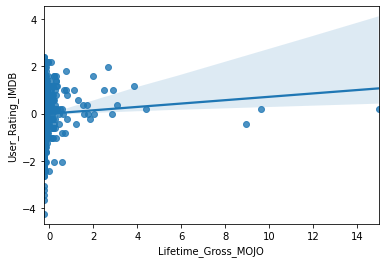

In [32]:
sns.regplot(x='Lifetime_Gross_MOJO', y = 'User_Rating_IMDB', data = scaled_features)

In [ ]:
#Using three features; user rating by IMDB, Mojo ranking by box office, and max number of theaters
lr_full = LinearRegression()
X = scaled_features.loc[:,['User_Rating_IMDB','Rank_MOJO_by_Box_office','Max_Theaters']]
y = scaled_features['Metacritic']
lr_full.fit(X,y)
lr_full.score(X,y)

In [52]:
lr_full = LinearRegression()
X = scaled_features.loc[:,['Rank_MOJO_by_Box_office', 'Lifetime_Gross_MOJO','Max_Theaters',
                     'Opening_Box', 'Opening_Th', 'User_Rating_IMDB',
                     'Number_of_votes_IMDB', 'Release_Difference']]
y = scaled_features['Metacritic']
lr_full.fit(X,y)
lr_full.score(X,y)

0.23889885063829686

<AxesSubplot:xlabel='User_Rating_IMDB', ylabel='Metacritic'>

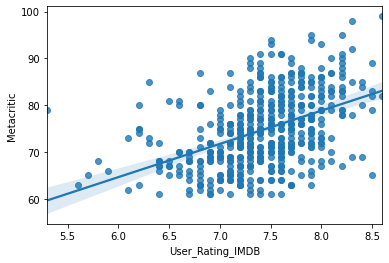

In [53]:
sns.regplot(x='User_Rating_IMDB', y = 'Metacritic', data = df)

In [54]:
#Using user rating by IMDB to predict Metacritic score
lr_full = LinearRegression()
X = scaled_features['User_Rating_IMDB'].values.reshape(-1,1)
y = scaled_features['Metacritic']
lr_full.fit(X,y)
lr_full.score(X,y)

0.20468281639405672

<AxesSubplot:xlabel='User_Rating_IMDB', ylabel='Lifetime_Gross_MOJO'>

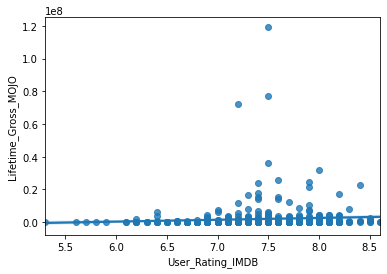

In [55]:
sns.regplot(x='User_Rating_IMDB', y = 'Lifetime_Gross_MOJO', data = df)

In [56]:
lr_full = LinearRegression()
X = scaled_features['User_Rating_IMDB'].values.reshape(-1,1)
y = scaled_features['Lifetime_Gross_MOJO']
lr_full.fit(X,y)
lr_full.score(X,y)

0.00511118457575277

<AxesSubplot:xlabel='Lifetime_Gross_MOJO', ylabel='Metacritic'>

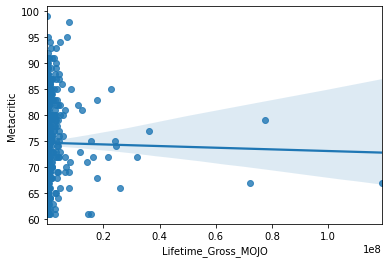

In [57]:
sns.regplot(x='Lifetime_Gross_MOJO', y = 'Metacritic', data = df)

In [58]:
lr_full = LinearRegression()
X = scaled_features['Lifetime_Gross_MOJO'].values.reshape(-1,1)
y = scaled_features['Metacritic']
lr_full.fit(X,y)
lr_full.score(X,y)

0.0002541988865154554

<AxesSubplot:xlabel='Max_Theaters', ylabel='Opening_Box'>

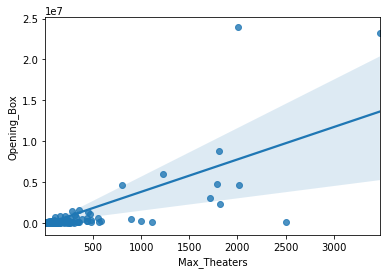

In [60]:
sns.regplot(x='Max_Theaters', y = 'Opening_Box', data = df)

In [59]:
lr_full = LinearRegression()
X = scaled_features['Max_Theaters'].values.reshape(-1,1)
y = scaled_features['Opening_Box']
lr_full.fit(X,y)
lr_full.score(X,y)

0.5482139539140696

## Lasso and Ridge Models where target is Metacritic score

In [100]:
X = smaller_df.loc[:,['Lifetime_Gross_MOJO', 'Max_Theaters', 'Opening_Box', 'Opening_Th',
       'User_Rating_IMDB', 'Number_of_votes_IMDB']]
y = smaller_df['Metacritic']
X['UR2'] = X['User_Rating_IMDB'] **2


In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lifetime_Gross_MOJO   524 non-null    int64  
 1   Max_Theaters          524 non-null    float64
 2   Opening_Box           524 non-null    float64
 3   Opening_Th            524 non-null    float64
 4   User_Rating_IMDB      524 non-null    float64
 5   Number_of_votes_IMDB  524 non-null    int64  
 6   UR2                   524 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 28.8 KB


In [102]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [103]:
X_train.columns

Index(['Lifetime_Gross_MOJO', 'Max_Theaters', 'Opening_Box', 'Opening_Th',
       'User_Rating_IMDB', 'Number_of_votes_IMDB', 'UR2'],
      dtype='object')

In [104]:
print('The shape of the training data set is:{}'.format( X_train.shape))
print('The shape of the validation data set is:{}'.format(X_val.shape))
print('The shape of the test data set is:{}'.format(X_test.shape))

The shape of the training data set is:(314, 7)
The shape of the validation data set is:(105, 7)
The shape of the test data set is:(105, 7)


In [105]:
selected_columns = ['Lifetime_Gross_MOJO', 'Max_Theaters', 'Opening_Box', 'Opening_Th',
       'User_Rating_IMDB', 'Number_of_votes_IMDB']

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 493 to 269
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lifetime_Gross_MOJO   314 non-null    int64  
 1   Max_Theaters          314 non-null    float64
 2   Opening_Box           314 non-null    float64
 3   Opening_Th            314 non-null    float64
 4   User_Rating_IMDB      314 non-null    float64
 5   Number_of_votes_IMDB  314 non-null    int64  
 6   UR2                   314 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 19.6 KB


In [107]:
lasso_model = Lasso(alpha = 1000000)
lasso_model.fit(X_train.loc[:, selected_columns], y_train)

Lasso(alpha=1000000)

In [108]:
list(zip(selected_columns, lasso_model.coef_))

[('Lifetime_Gross_MOJO', 2.2683717178352964e-08),
 ('Max_Theaters', -0.0),
 ('Opening_Box', -0.0),
 ('Opening_Th', -0.0),
 ('User_Rating_IMDB', 0.0),
 ('Number_of_votes_IMDB', 0.0)]

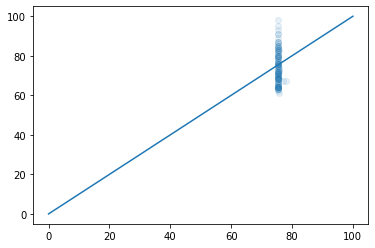

In [109]:
test_set_pred = lasso_model.predict(X_test.loc[:,selected_columns])
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,100,100), np.linspace(0,100,100))

In [110]:
r2_score(y_test, test_set_pred)

-0.027338249848224194

In [111]:
lr_model_ridge = Ridge(alpha = 1000000000000)
lr_model_ridge.fit(X_train.loc[:, selected_columns], y_train)
list(zip(selected_columns, lr_model_ridge.coef_))

[('Lifetime_Gross_MOJO', 3.4160067452285644e-07),
 ('Max_Theaters', -1.648782112949061e-09),
 ('Opening_Box', -2.1891840615151695e-06),
 ('Opening_Th', -1.5858445059876857e-08),
 ('User_Rating_IMDB', 5.405155314366982e-10),
 ('Number_of_votes_IMDB', 5.51053247632524e-06)]

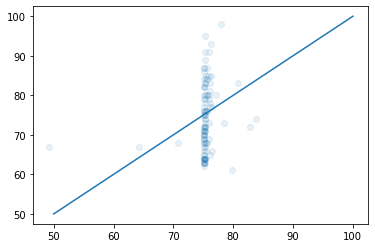

In [113]:
test_set_pred = lr_model_ridge.predict(X_test.loc[:,selected_columns])
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(50,100,100), np.linspace(50,100,100))

In [114]:
#r-squared
r2_score(y_test, test_set_pred)

-0.044575423669607206

In [ ]:
'''
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

# Lasso and Ridge Models where Target is Lifetime Gross

In [126]:
X = smaller_df.loc[:,['Max_Theaters', 'Opening_Box', 'Opening_Th',
       'User_Rating_IMDB', 'Number_of_votes_IMDB', 'Metacritic']]
y = smaller_df['Lifetime_Gross_MOJO']
X['UR2'] = X['User_Rating_IMDB'] **2

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

print('The shape of the training data set is:{}'.format( X_train.shape))
print('The shape of the validation data set is:{}'.format(X_val.shape))
print('The shape of the test data set is:{}'.format(X_test.shape))

X_train.columns

The shape of the training data set is:(314, 7)
The shape of the validation data set is:(105, 7)
The shape of the test data set is:(105, 7)


Index(['Max_Theaters', 'Opening_Box', 'Opening_Th', 'User_Rating_IMDB',
       'Number_of_votes_IMDB', 'Metacritic', 'UR2'],
      dtype='object')

In [116]:
selected_columns = ['Max_Theaters', 'Opening_Box', 'Opening_Th',
       'User_Rating_IMDB', 'Number_of_votes_IMDB', 'Metacritic', 'UR2']

lasso_model = Lasso(alpha = 1000000)
lasso_model.fit(X_train.loc[:, selected_columns], y_train)

list(zip(selected_columns, lasso_model.coef_))

[('Max_Theaters', 19928.35807504611),
 ('Opening_Box', 3.289122699489365),
 ('Opening_Th', -20529.276478576136),
 ('User_Rating_IMDB', 0.0),
 ('Number_of_votes_IMDB', 25.676476846006587),
 ('Metacritic', 0.0),
 ('UR2', 0.0)]

In [117]:
test_set_pred = lasso_model.predict(X_test.loc[:,selected_columns])

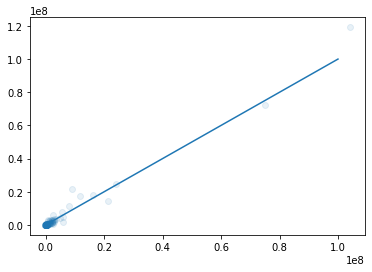

In [118]:
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,100000000,1000), np.linspace(0,100000000,1000))

In [119]:
r2_score(y_test, test_set_pred)

0.9724985479698546

In [120]:
#Mean absolute error
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

850927.0046803962

In [121]:
lr_model_ridge = Ridge(alpha = 1000000000000)
lr_model_ridge.fit(X_train.loc[:, selected_columns], y_train)
list(zip(selected_columns, lr_model_ridge.coef_))

[('Max_Theaters', 0.0447812337743501),
 ('Opening_Box', 3.141445607148151),
 ('Opening_Th', -0.009563662507391144),
 ('User_Rating_IMDB', 4.993443137529274e-05),
 ('Number_of_votes_IMDB', 3.6917200254050067),
 ('Metacritic', 0.0010047963265476067),
 ('UR2', 0.0007365912054802378)]

In [122]:
test_set_pred = lr_model_ridge.predict(X_test.loc[:,selected_columns])

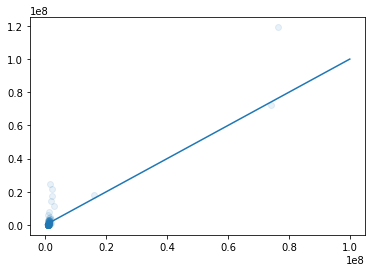

In [125]:
test_set_pred = lr_model_ridge.predict(X_test.loc[:,selected_columns])
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,100000000,1000), np.linspace(0,100000000,1000))

In [124]:
r2_score(y_test, test_set_pred)

0.8330409246811136

## Standard-scaling Features

In [132]:
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [133]:
lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr, y_train)

Lasso(alpha=10000)

In [134]:
list(zip(X_train.columns, lasso_model.coef_))

[('Max_Theaters', 4669366.29879628),
 ('Opening_Box', 2380662.489018873),
 ('Opening_Th', -4485345.0335535845),
 ('User_Rating_IMDB', 49328.13466602421),
 ('Number_of_votes_IMDB', 257612.32505311104),
 ('Metacritic', 48196.02639819516),
 ('UR2', 0.0)]

In [135]:
test_set_pred = lasso_model.predict(X_test.loc[:,selected_columns])

In [136]:
r2_score(y_test, test_set_pred)

-317551349061.73615

## Automated Regularization by CV